# Veriyi Yükleme

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir=r"C:\Users\ademdayan36\Desktop\Tensorflow ile derin öğrenme\trafik\data_tf\data"

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(32,32),subset="training",batch_size=64,shuffle=True)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(32,32),subset="validation",batch_size=64,shuffle=False)

Found 31320 images belonging to 43 classes.
Found 3479 images belonging to 43 classes.


# Görselleştirme

{'0_Speed_limit_(20kmh)': 0, '10_No_passing_for_vechiles_over_3.5_metric_tons': 1, '11_Right_of_way_at_the_next_intersection': 2, '12_Priority_road': 3, '13_Yield': 4, '14_Stop': 5, '15_No_vechiles': 6, '16_Vechiles_over_3.5_metric_tons_prohibited': 7, '17_No_entry': 8, '18_General_caution': 9, '19_Dangerous_curve_to_the_left': 10, '1_Speed_limit_(30kmh)': 11, '20_Dangerous_curve_to_the_right': 12, '21_Double_curve': 13, '22_Bumpy_road': 14, '23_Slippery_road': 15, '24_Road_narrows_on_the_right': 16, '25_Road_work': 17, '26_Traffic_signals': 18, '27_Pedestrians': 19, '28_Children_crossing': 20, '29_Bicycles_crossing': 21, '2_Speed_limit_(50kmh)': 22, '30_Beware_of_icesnow': 23, '31_Wild_animals_crossing': 24, '32_End_of_all_speed_and_passing_limits': 25, '33_Turn_right_ahead': 26, '34_Turn_left_ahead': 27, '35_Ahead_only': 28, '36_Go_straight_or_right': 29, '37_Go_straight_or_left': 30, '38_Keep_right': 31, '39_Keep_left': 32, '3_Speed_limit_(60kmh)': 33, '40_Roundabout_mandatory': 34,

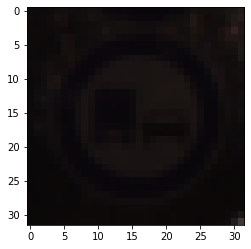

(64, 32, 32, 3)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


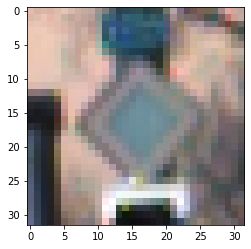

(64, 32, 32, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


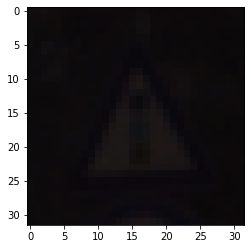

(64, 32, 32, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


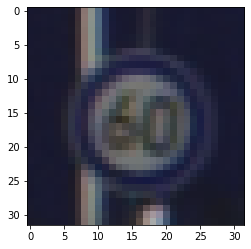

(64, 32, 32, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


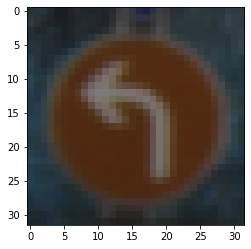

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
print(train_datagen.class_indices)
for _ in range(5):
    img, label = train_datagen.next()
    print(img.shape)   
    plt.imshow(img[0])
    print(label[0])   

    plt.show()

# Kütüphaneler

In [3]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations

# Model Oluşumu

In [4]:
model=Sequential()

model.add(layers.Conv2D(filters=32,activation="relu",kernel_size=(5,5),input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64,activation="relu",kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64,activation="relu",kernel_size=(2,2)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64,activation="relu",kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(500,activation="relu"))
model.add(layers.Dense(500,activation="relu"))
model.add(layers.Dense(43,activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

# Model Eğitimi

In [6]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()

In [7]:
model.compile(optimizer=optimizer,loss=loss,metrics=["accuracy"])

In [8]:
result=model.fit(train_datagen,epochs=10,verbose=1,validation_data=test_datagen)

Epoch 1/10
490/490 [==============================] - 222s 452ms/step - loss: 1.6650 - accuracy: 0.5069 - val_loss: 0.5277 - val_accuracy: 0.8229
Epoch 2/10
490/490 [==============================] - 31s 62ms/step - loss: 0.2675 - accuracy: 0.9191 - val_loss: 0.2973 - val_accuracy: 0.8982
Epoch 3/10
490/490 [==============================] - 31s 64ms/step - loss: 0.1247 - accuracy: 0.9626 - val_loss: 0.2246 - val_accuracy: 0.9345
Epoch 4/10
490/490 [==============================] - 32s 65ms/step - loss: 0.0820 - accuracy: 0.9767 - val_loss: 0.1627 - val_accuracy: 0.9520
Epoch 5/10
490/490 [==============================] - 32s 65ms/step - loss: 0.0616 - accuracy: 0.9811 - val_loss: 0.2246 - val_accuracy: 0.9287
Epoch 6/10
490/490 [==============================] - 32s 65ms/step - loss: 0.0527 - accuracy: 0.9845 - val_loss: 0.1892 - val_accuracy: 0.9394
Epoch 7/10
490/490 [==============================] - 32s 65ms/step - loss: 0.0459 - accuracy: 0.9865 - val_loss: 0.2145 - val_accurac

In [9]:
result.history

{'loss': [1.665046215057373,
  0.26751628518104553,
  0.12470120936632156,
  0.08202572911977768,
  0.061614029109478,
  0.05270278453826904,
  0.045936550945043564,
  0.03958556056022644,
  0.0431387796998024,
  0.03307001665234566],
 'accuracy': [0.506864607334137,
  0.9191251397132874,
  0.962611734867096,
  0.9767241477966309,
  0.9810664057731628,
  0.9845466017723083,
  0.986494243144989,
  0.9876436591148376,
  0.9867497086524963,
  0.9897509813308716],
 'val_loss': [0.5277321338653564,
  0.2973461449146271,
  0.2245917022228241,
  0.1627478152513504,
  0.22460560500621796,
  0.18917904794216156,
  0.2144741415977478,
  0.23598690330982208,
  0.15348343551158905,
  0.31484538316726685],
 'val_accuracy': [0.8229376077651978,
  0.8982466459274292,
  0.9344639182090759,
  0.951997697353363,
  0.928715169429779,
  0.9393503665924072,
  0.943374514579773,
  0.9405001401901245,
  0.9620580673217773,
  0.9479735493659973]}

In [10]:
model.save("agirlik_udemy.h5")

# Model Testi

In [11]:
model.evaluate(test_datagen)

55/55 [==============================] - 2s 41ms/step - loss: 0.3148 - accuracy: 0.9480


[0.31484538316726685, 0.9479735493659973]

# Görselleştirme

In [12]:
result.history

{'loss': [1.665046215057373,
  0.26751628518104553,
  0.12470120936632156,
  0.08202572911977768,
  0.061614029109478,
  0.05270278453826904,
  0.045936550945043564,
  0.03958556056022644,
  0.0431387796998024,
  0.03307001665234566],
 'accuracy': [0.506864607334137,
  0.9191251397132874,
  0.962611734867096,
  0.9767241477966309,
  0.9810664057731628,
  0.9845466017723083,
  0.986494243144989,
  0.9876436591148376,
  0.9867497086524963,
  0.9897509813308716],
 'val_loss': [0.5277321338653564,
  0.2973461449146271,
  0.2245917022228241,
  0.1627478152513504,
  0.22460560500621796,
  0.18917904794216156,
  0.2144741415977478,
  0.23598690330982208,
  0.15348343551158905,
  0.31484538316726685],
 'val_accuracy': [0.8229376077651978,
  0.8982466459274292,
  0.9344639182090759,
  0.951997697353363,
  0.928715169429779,
  0.9393503665924072,
  0.943374514579773,
  0.9405001401901245,
  0.9620580673217773,
  0.9479735493659973]}

In [13]:
acc=result.history["accuracy"]
val_acc=result.history["val_accuracy"]
acc_loss=result.history["loss"]
val_loss=result.history["val_loss"]

In [14]:
epoch=range(1,len(acc)+1)

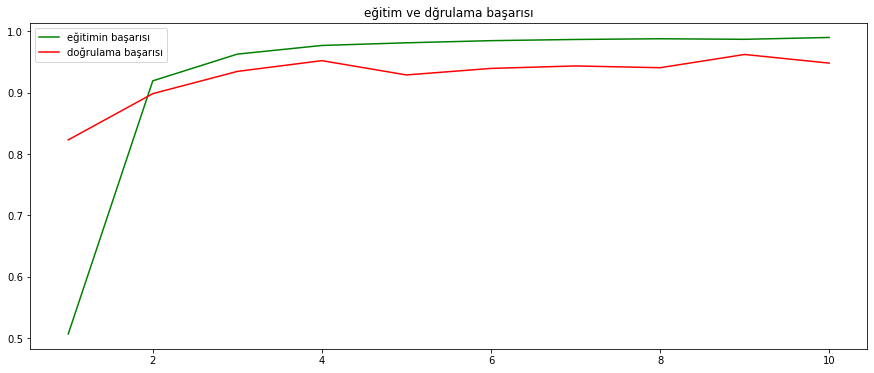

In [15]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc,label=("eğitimin başarısı"),color="g")
plt.plot(epoch,val_acc,label=("doğrulama başarısı"),color="r")
plt.title("eğitim ve dğrulama başarısı")
plt.legend()

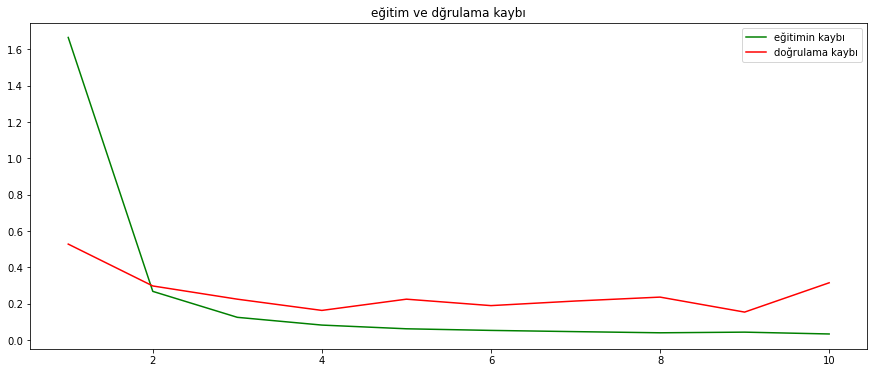

In [16]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc_loss,label=("eğitimin kaybı"),color="g")
plt.plot(epoch,val_loss,label=("doğrulama kaybı"),color="r")
plt.title("eğitim ve dğrulama kaybı")
plt.legend()

# Eğitilmiş Modeli Yükleme

In [17]:
from tensorflow.keras.models import load_model
model = load_model("agirlik_udemy.h5")

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

# Webcam 

In [ ]:
import numpy as np
import cv2
from tensorflow import keras

# Kamera ve Görüntüleme Ayarları
frameWidth = 640
frameHeight = 480
brightness = 180
threshold = 0.90  # Minimum olasılık eşiği
font = cv2.FONT_HERSHEY_SIMPLEX

cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)

# Model Yükleme
model = keras.models.load_model("agirlik_udemy.h5", compile=False)

# Görüntü Ön İşleme
def preprocessing(img):
    img = img / 255.0  # Normalize et
    return img

# Sınıf Adı Getirici
def getClassName(classNo):
    classes = [
        "Hız Limit 20 km/h", "Dur", "Bir sonraki kavşakta yol hakkı", "Hız Limit 30 km/h", "13_Yield", "Dur", "Araç yok",
        "Dur", "Giriş yok", "Genel Dikkat", "Soldaki Tehlikeli Eğri", "Hız Limit 30 km/h", "Sağdaki Tehlikeli Eğri",
        "Çift Eğri", "Engebeli yol", "Kaygan", "Yol Daralan Sagda", "Yol çalışması", "Trafik İşaretleri", "Yayalar",
        "Çocuk Geçişi", "Bisiklet Geçişi", "Hız Limit 50 km/h", "Buz Dikkat", "Vahşi hayvanların geçişi",
        "Tüm hız ve geçiş limitlerinin sonu", "Sağa Dön", "Sola Dön", "Sadece İleri", "Düz veya sağa git", 
        "Düz veya sola git", "Sağdan Gidin", "Soldan Gidin", "Hız Limit 60 km/h", "Çocuk Geçişi", 
        "41_End_of_no_passing", "Dur", "Hız Limit 70 km/h", "Hız Limit 80 km/h", "Hız sınırı sonu 80 km/h", 
        "Hız Limit 100 km/h", "Hız Limit 120 km/h", "Geçiş yok"
    ]
    return classes[classNo] if 0 <= classNo < len(classes) else "Bilinmiyor"

# Video Akışı İşleme
while True:
    success, imgOriginal = cap.read()
    
    if not success:  # Kamera açılmazsa çık
        print("Kamera görüntüsü alınamıyor.")
        break

    img = cv2.resize(imgOriginal, (32, 32))  # Model için uygun boyuta yeniden boyutlandır
    img = preprocessing(img)
    img = img.reshape(1, 32, 32, 3)  # Model girişi için şekil
    
    predictions = model.predict(img)  # Tahmin yap
    classIndex = np.argmax(predictions)  # En yüksek olasılık sınıfını al
    probabilityValue = np.amax(predictions)  # En yüksek olasılık değeri

    # Sonuçları Görüntüye Yaz
    if probabilityValue > threshold:
        cv2.putText(imgOriginal, f"Sonuç: {getClassName(classIndex)}", (20, 35), font, 0.75, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.putText(imgOriginal, f"Olasılık: {probabilityValue * 100:.2f}%", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    
    # Görüntüyü Göster
    cv2.imshow("Sonuç", imgOriginal)

    # Çıkış için 'q' tuşuna bas
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Kaynakları Serbest Bırak
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 0s/step
